# Lab session 2 ---- Logistic Regression

Student Name: VAMSHI KODIPAKA

Submitted Date: 07-Apr-2019



## I. Introduction

In this exercise, we will implement logistic regression.
Note that you should have completed Lab1, and, in particular, understand the gradient descent algorithm.

## II. Logistic regression
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
The file lab2data1.txt contains historical data from previous applicants. The first two columns correspond to the applicant’s scores on the two exams and the last column is the admission decision; a value equals to 0 means the applicant was not selected, while a value equals to 1 means that he/she was accepted.
Your task is to build a classifier that will estimate an applicant’s probability of admission based on his scores in the two exams.

### Loading of Data

In [1]:
# Numpy is for Scientific and vector computation for python
import numpy as np
# Matplotlib is Plotting library
import matplotlib.pyplot as plt
# Pandas lib is used for Data manipulation and analysis
import pandas as pd

In [2]:
# Loading data
# first two columns contains exam scores and third column contains label.
read=pd.read_csv("lab2data1.txt",header=None)
XData=read.iloc[:,:-1].values    # X-data
yData=read.iloc[:,-1].values     # Y-data

In [3]:
# head() method is used to return top n (5 by default) rows of a data frame 
read.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Pandas describe() is used to view some basic statistical details
read.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Solution 2.1 Visualizing the data

Plotting Data

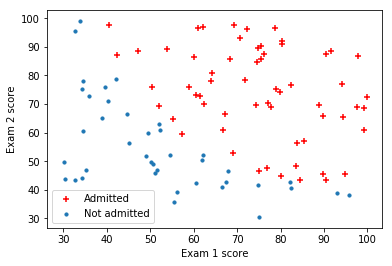

In [5]:
#PLOTTING THE DATA -------------------------
positive , negative = (yData==1).reshape(100,1) , (yData==0).reshape(100,1)

# Plot Examples
plt.scatter(XData[positive[:,0],0],XData[positive[:,0],1],c="r",marker="+")
plt.scatter(XData[negative[:,0],0],XData[negative[:,0],1],marker="o",s=10)

# adding axes labels
plt.xlabel("Exam 1 score")     #  X-Label
plt.ylabel("Exam 2 score")     #  Y-label
plt.legend(["Admitted","Not admitted"],loc=0)  #representations

<a id="section1"></a>
### Solution 2.2 Implementation

#### 2.2.1  sigmoid function

We know that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.


<a id="sigmoid"></a>

In [6]:
def sigmoid(z):
    
    """
    Computing sigmoid function for input z.
    
    Params
    ------
    z : This is a 1-D vector or a 2-D matrix. 
    
    Returns
    -------
    g : g has the same shape as z, since the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Here, z can be a matrix, vector or scalar.
    """
    
    return 1/ (1 + np.exp(-z))

The following cell evaluates the sigmoid function at `z=0`. We should get a value of 0.5. You can also try different values for `z` to experiment with the sigmoid function.

In [7]:
# testing the sigmoid function
sigmoid(0)

0.5

### Solution 2.3 Compute the Cost Function and Gradient


Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>



Now implementing the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X. 

In [8]:
def costFunction(theta, XData, yData):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    
    Computing cost and gradient for logistic regression. 
    
    Params
    ----------
    theta :This a vector of shape (n+1, ).
    
    XData : shape (m x n+1) where m - total number of data points and n is the number of features.
        We assume the intercept has already been added to the input.
    
    yData : This is a vector of shape (m, ).
    
    Returns
    -------
    J : The computed value for the cost function. 
    
    grad : Vector is of shape (n+1, )
        

    """
    # CODE STARTS HERE --------------------
    
    m=len(yData)
    
    predictions = sigmoid(np.dot(XData,theta))                     # predictions by sigmoid
    error = (-yData * np.log(predictions)) - ((1-yData)*np.log(1-predictions)) #error calculation

    cost = 1/m * sum(error)     # cost caluculation
    
    grad = 1/m * np.dot(XData.transpose(),(predictions - yData))   #gradient calculation
    
    return cost[0] , grad

### Feature scaling

In [9]:
def featureNormalization(XData):
    """
    Taking numpy array of XData values and returning normalize XData values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(XData,axis=0)   # mean calculatation here
    std=np.std(XData,axis=0)     # standard dev calculation here
    
    XData_norm = (XData - mean)/std     #normalization done
    
    return XData_norm , mean , std

In [10]:
m , n = XData.shape[0], XData.shape[1]

# Calling featureNormalization Function here
XData, XData_mean, XData_std = featureNormalization(XData)

# appending ones to the XData MAtrix
XData= np.append(np.ones((m,1)),XData,axis=1)
yData=yData.reshape(m,1)
initial_theta = np.zeros((n+1,1))

#calling costFunction here
cost, grad= costFunction(initial_theta,XData,yData)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [11]:
def gradientDescent(XData,yData,theta,alpha,num_iters):
    """
    Taking in numpy array XData, yData and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(yData)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,XData,yData)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [12]:
theta , J_history = gradientDescent(XData,yData,initial_theta,1,400)

In [13]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### 2.4 Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

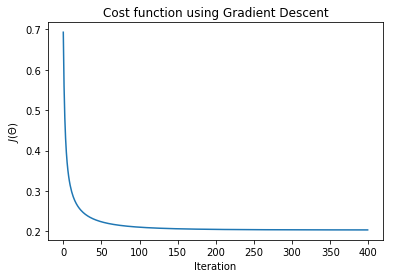

In [14]:
# Plotting Boundary
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Solution 2.5 Plotting the decision boundary

We know that

$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

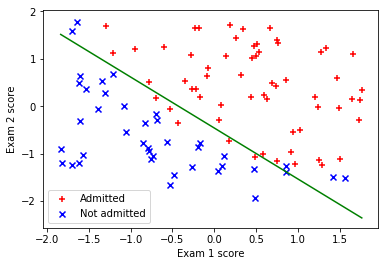

In [15]:
 """
    Predicting whether the label is 0 or 1 using learned logistic regression.
    Computing the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Params
    ------
    theta :  shape (n+1, ).
    
    X : The rows is the number of points to compute predictions, and columns is the number of features.

    Returns
    -------
    p : Predictions and 0 or 1 for each row in X. 
    
    """
plt.scatter(XData[positive[:,0],1],XData[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XData[negative[:,0],1],XData[negative[:,0],2],c="b",marker="x",label="Not admitted")

x_value= np.array([np.min(XData[:,1]),np.max(XData[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]

plt.plot(x_value,y_value, "g")

# Setting Labels
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

###  2.6 Prediction

In [16]:
def classifierPredict(theta,XData):
    """
    take in numpy array of theta and XData and predict the class 
    """
    predictions = XData.dot(theta)
    
    return predictions>0

In [17]:
#  Predicting probability for a student with score 45 on exam 1 and score 85 on exam 2 

x_test = np.array([45,85])
x_test = (x_test - XData_mean)/XData_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


### Accuracy on training set 

In [18]:
# Computing accuracy on the training set
XData_test = np.array([45,85])
p=classifierPredict(theta,XData)
print("Train Accuracy:", sum(p==yData)[0],"%")

Train Accuracy: 89 %


## III. Logistic regression with regularization
In this part, we will see the full power of logistic regression. Suppose that you are the production manager of a factory that produces microchips. After production, each microchip goes through various tests to ensure it functions correctly.
The file lab2data2.txt contains test results for some microchips on two tests. The first two columns correspond to the tests results, and the last column indicates whether the microchip should be accepted or not; 0 means rejected while 1 means accepted.
Using your function plotData(X,y), you can visualize the training data. As can be seen in Figure 3, this data is clearly not linearly separable, so a straight-forward application of logistic regression will not find a good decision boundary.

### Loading the data

In [19]:
# Load Data
# The first two columns contains the X values and the third column contains the label (y).
read=pd.read_csv("lab2data2.txt", header=None)
read.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [20]:
# Pandas describe() is used to view some basic statistical details
read.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [21]:
XData=read.iloc[:,:-1].values
yData=read.iloc[:,-1].values

### 3.1 Plotting of the data

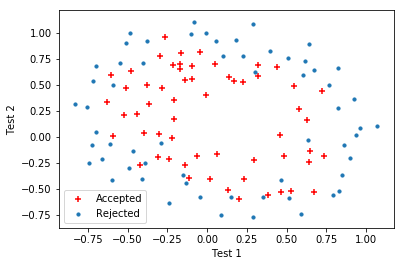

In [22]:
positive , negative = (yData==1).reshape(118,1) , (yData==0).reshape(118,1)
plt.scatter(XData[positive[:,0],0],XData[positive[:,0],1],c="r",marker="+")
plt.scatter(XData[negative[:,0],0],XData[negative[:,0],1],marker="o",s=10)

# Labels and Legend Representation
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

### 3.2 Feature Mapping

with k variables and degrees of n, the number of polynomial terms:

$ {k+ n \choose n}$

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

In [23]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for ii in range(1,degree+1):
        for jj in range(ii+1):
            terms= (x1**(ii-jj) * x2**jj).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [24]:
XData = mapFeature(XData[:,0], XData[:,1],6)

<a id="section5"></a>
### Cost function and gradient

We know that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [25]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [26]:
def costFunctionReg(theta, XData, yData ,Lambda):
    """
    Params
    ------
    theta : shape (n, ). n is the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total number of polynomial features. 
    
    XData :  shape (m x n). m is the number of examples, and n is the number of features (after feature mapping).
    
    yData :  shape (m, ).
    
    lambda_ : float and regularization parameter. 
    
    Returns
    -------
    J : The computed value for the regularized cost function. 
    
    grad : shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    # CODE STARTS HERE -----------------------
    m=len(yData)
    yData=yData[:,np.newaxis]
    predictions = sigmoid(XData @ theta)       # Sigmoid functioin calling
    error = (-yData * np.log(predictions)) - ((1-yData)*np.log(1-predictions))  #logistic error 
    cost = 1/m * sum(error)                     # regularized cost estimation
    regCost= cost + Lambda/(2*m) * sum(theta**2)
   
    # compute gradient
    j_0= 1/m * (XData.transpose() @ (predictions - yData))[0]
    j_1 = 1/m * (XData.transpose() @ (predictions - yData))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return cost[0], grad

In [27]:
# Initialize fitting parameters
initial_theta = np.zeros((XData.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, XData, yData, Lambda)

In [28]:
# Display the cost value
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599461


### Gradient Descent

In [29]:
def gradientDescent(XData,yData,theta,alpha,num_iters,Lambda):

    # Calculate gradients
    """
    Take in numpy array XData, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
# Calculate cost
# NOTE: It is important to note that parameter iteration start at j=0, where sample iteration start at m=1.
# Therefore, the bias parameter should not be used in calculation of regularization
    m=len(yData)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,XData,yData,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [30]:
# Calculate gradients or calculating gradients for lambda=1
theta , J_history = gradientDescent(XData,yData,initial_theta,1,800,1)

In [31]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 1.27265124]
 [ 0.62523599]
 [ 1.1810378 ]
 [-2.01978329]
 [-0.91724531]
 [-1.43134994]
 [ 0.12404797]
 [-0.36557345]
 [-0.35735547]
 [-0.17504587]
 [-1.45820475]
 [-0.05113418]
 [-0.61561074]
 [-0.27466602]
 [-1.19283627]
 [-0.24214745]
 [-0.20606386]
 [-0.04487072]
 [-0.27776645]
 [-0.29539556]
 [-0.45646407]
 [-1.04327004]
 [ 0.02766609]
 [-0.29248124]
 [ 0.01548151]
 [-0.32739751]
 [-0.14386541]
 [-0.92484738]]


### Plot Cost function

Text(0.5, 1.0, 'Cost est function using Gradient Descent')

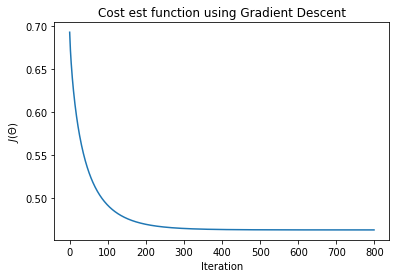

In [32]:
# Plotting starts here------------
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost est function using Gradient Descent")

### 3.3 Plot Decision Boundary - lambda=0.2

In [33]:
# Drawing Decision plot
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

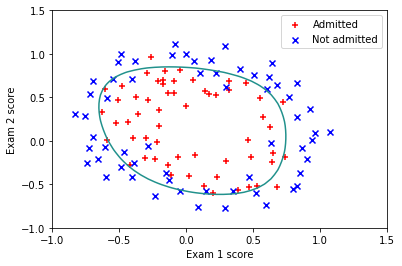

In [34]:
#Representing Positive and Negative between Decision boundry 

plt.scatter(XData[positive[:,0],1],XData[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XData[negative[:,0],1],XData[negative[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### 3.4 Accuracy of model

In [35]:
# Prediction using the model
def classifierPredict(theta,XData):
    """
    take in numpy array of theta and XData and predict the class 
    """
    predictions = XData.dot(theta)
    
    return predictions>0

In [36]:
# Finding Taining Accuracy of the model
p=classifierPredict(theta,XData)
print("Train Accuracy:", (sum(p==yData[:,np.newaxis])/len(yData) *100)[0],"%")

Train Accuracy: 83.05084745762711 %


### 3.5 Testing for different lambda

### a. Decision boundary when lambda=1

In [37]:
# Calculate gradients
theta , J_history = gradientDescent(XData,yData,initial_theta,1,800,1)

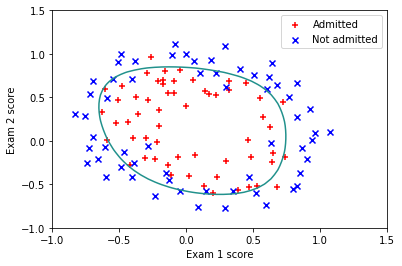

In [38]:
#Representing Positive and Negative between Decision boundry 

plt.scatter(XData[positive[:,0],1],XData[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XData[negative[:,0],1],XData[negative[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### b. Decision boundary when lambda=10

In [39]:
# Calculate gradients
theta , J_history = gradientDescent(XData,yData,initial_theta,1,800,10)

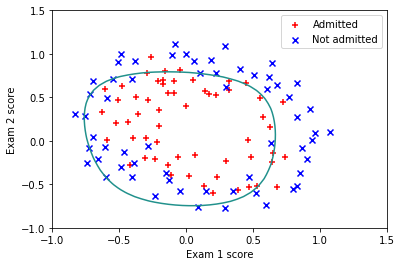

In [40]:
#Representing Positive and Negative between Decision boundry 

plt.scatter(XData[positive[:,0],1],XData[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XData[negative[:,0],1],XData[negative[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### c. Decision boundary when lambda=100

In [41]:
# Calculate gradients
theta , J_history = gradientDescent(XData,yData,initial_theta,1,800,100)

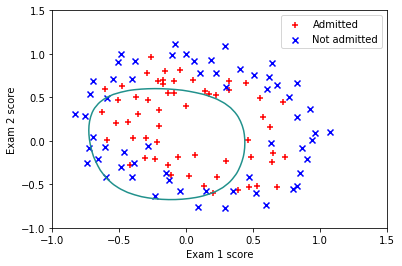

In [42]:
#Representing Positive and Negative between Decision boundry 

plt.scatter(XData[positive[:,0],1],XData[positive[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XData[negative[:,0],1],XData[negative[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### 3.5 Observation:: 

If the lambda value is small and close to lambda=1, the model is perfectly fitting training data.

If lambda > 1 and the underfitting problem arises(that is we observe for lambda=10, lambda=100 and so on).

So, best value for lambda for this model is 1.


### References

[1]  Dr.Desire Sidibe's Class Notes

[2] Course era :: | Model Representation — Andrew Ng

[3]  Machine Learning by Andrew Ng: Logistic Regression with Regularization::
     https://www.youtube.com/watch?v=t1IT5hZfS48

[4] Machine Learning by Andrew Ng : Logistic Regression with Regularization::
    https://www.youtube.com/watch?v=IXPgm1e0IOo

## CHEERS!